##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get Started with TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To run the Colab notebook:

1. Connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

For more examples and guides (including details for this program), see [Get Started with TensorFlow](https://www.tensorflow.org/get_started/).

Let's get started, import the TensorFlow library into your program:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import ssl
import requests

In [2]:
import os

In [3]:
#https://www.tensorflow.org/tutorials/load_data/images

#images folder path
dirname = os.getcwd()
curpath = os.path.join(dirname, 'dev_ws/dataset/crop-images')

In [68]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#specify image dimensions
img_height = 28
img_width = 28

#load in the dataset with train-test split
train_ds = tf.keras.utils.image_dataset_from_directory(curpath, validation_split=0.2, subset="training", seed=123,
  image_size=(img_height, img_width))
val_ds = tf.keras.utils.image_dataset_from_directory(curpath, validation_split=0.2, subset="validation", seed=123,
  image_size=(img_height, img_width))

Found 54320 files belonging to 9 classes.
Using 43456 files for training.
Found 54320 files belonging to 9 classes.
Using 10864 files for validation.


Let's examine our dataset. Below code was taken from https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [70]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1358/1358 [==============================] - 24s 17ms/step - loss: 3.7546 - accuracy: 0.8601 - val_loss: 0.4861 - val_accuracy: 0.9006
Epoch 2/10
1358/1358 [==============================] - 27s 20ms/step - loss: 0.6005 - accuracy: 0.8812 - val_loss: 0.5671 - val_accuracy: 0.9100
Epoch 3/10
1358/1358 [==============================] - 24s 18ms/step - loss: 0.5724 - accuracy: 0.8818 - val_loss: 0.5204 - val_accuracy: 0.9252
Epoch 4/10
1358/1358 [==============================] - 36s 27ms/step - loss: 0.5406 - accuracy: 0.8893 - val_loss: 0.3875 - val_accuracy: 0.9251
Epoch 5/10
1358/1358 [==============================] - 22s 16ms/step - loss: 0.4845 - accuracy: 0.8903 - val_loss: 0.4289 - val_accuracy: 0.9186
Epoch 6/10
1358/1358 [==============================] - 30s 22ms/step - loss: 0.4560 - accuracy: 0.8954 - val_loss: 0.3842 - val_accuracy: 0.9239
Epoch 7/10
1358/1358 [==============================] - 21s 16ms/step - loss: 0.4740 - accuracy: 0.8955 - val_loss: 0.4271 -

You’ve now trained an image classifier with ~98% accuracy on this dataset. See [Get Started with TensorFlow](https://www.tensorflow.org/get_started/) to learn more.

In [47]:
from PIL import Image

Import libraries to handle loading and displaying images

In [73]:
def make_prediction_and_display_image(np_image, tensorflow_model):
    image = np_image.reshape(1, 28, 28)

    print("Predicted Label: ", np.argmax(tensorflow_model.predict(image)[0]))
    print('Actual image: ')
    plt.figure(figsize = (1, 1))
    plt.imshow(image[0].numpy().astype("uint8"), cmap = 'gray')

Test our model with one random image in our test set.

In [74]:
print("Predicted Label: ", np.argmax(model.predict(val_ds)[42]))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(val_ds[42].numpy().astype("uint8"), cmap = 'gray')

Predicted Label:  1
Actual image: 


TypeError: 'BatchDataset' object is not subscriptable

<Figure size 72x72 with 0 Axes>

In [58]:
number_three = np.array(np.array(Image.open('mnist_test/3.png')))
make_prediction_and_display_image(number_three, model)

ValueError: cannot reshape array of size 784 into shape (1,28,28,3)

Predicted Label:  8
Actual image: 


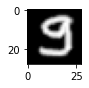

In [112]:
number_nine = np.array(np.array(Image.open('mnist_test/9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


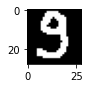

In [113]:
number_nine = np.array(np.array(Image.open('mnist_test/another_9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


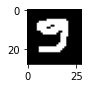

In [114]:
number_nine = np.array(np.array(Image.open('mnist_test/ugly_9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


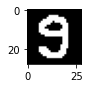

In [115]:
number_nine = np.array(np.array(Image.open('mnist_test/one_more_9.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


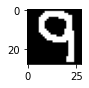

In [116]:
number_nine = np.array(np.array(Image.open('mnist_test/nine.png')))
make_prediction_and_display_image(number_nine, model)

Predicted Label:  8
Actual image: 


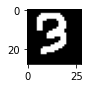

In [117]:
number_three = np.array(np.array(Image.open('mnist_test/3.png')))
make_prediction_and_display_image(number_three, model)

Predicted Label:  8
Actual image: 


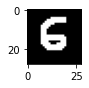

In [118]:
number_six=np.array(np.array(Image.open('mnist_test/6.png')))
make_prediction_and_display_image(number_six, model)

Predicted Label:  8
Actual image: 


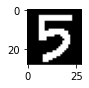

In [119]:
number_five = np.array(np.array(Image.open('mnist_test/number_five.png')))
make_prediction_and_display_image(number_five, model)

In [120]:
from tensorflow import keras

In [121]:
dirname = os.getcwd()
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.join(dirname, "training_1")

In [122]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [123]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [124]:
# Save the entire model as a SavedModel.
model.save('dev_ws/saved_model/my_model')

INFO:tensorflow:Assets written to: dev_ws/saved_model/my_model/assets


In [105]:
new_model = tf.keras.models.load_model('dev_ws/saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               540900    
                                                                 
 dropout_9 (Dropout)         (None, 100)              

In [69]:
# Evaluate the restored model
loss, acc = new_model.evaluate(val_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(val_ds).shape)

313/313 - 2s - loss: 0.0461 - accuracy: 0.9875 - 2s/epoch - 5ms/step
Restored model, accuracy: 98.75%
(10000, 10)
